In [101]:
#import required libraries
import pandas as pd
import string
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

In [102]:
#set col width to 100
pd.set_option('display.max_colwidth', 100)

#stop word removal
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
from nltk.tokenize import word_tokenize

#Importing the excel file
excel_file= 'Management Growth-Data relevant.xlsx'
growth_rel = pd.read_excel(excel_file)
growth_rel = growth_rel[['Sentences']]
growth_rel['label'] = 1

excel_file1= 'Management Growth-Data Not relevant.xlsx'
growth_notrel = pd.read_excel(excel_file1)
growth_notrel = growth_notrel[['Sentences']]
growth_notrel['label'] = 0

growth_final = pd.concat([growth_rel,growth_notrel])

#get the size of dataset
print(growth_final.shape)
growth_final.head()

(2234, 2)


,Sentences,label
0,Baidu formed a strategic partnership with Qualcomm to optimize Baidu's voice assistant DuerOS fo...,1
1,Blackbaud announced the results of a commissioned Total Economic Impact(TM) (TEI) study conducte...,1
2,"Earnings per fully diluted ADS on a GAAP basis were $in the first quarter of 2017, compared with...",1
3,"Fortescue's current director of operations, Greg Lilleyman, appears to be the frontrunner to bec...",1
4,"GAAP net loss for the third fiscal quarter was $million, or $per basic share, and non-GAAP net i...",1


In [103]:
#remove numeric values from dataset
growth_final['Sentences'] = growth_final['Sentences'].str.replace('\d+', '')

In [104]:
#add words that aren't in the NLTK stopwords list
new_stopwords = ['included','including','includes','one','two','three','general','generally','way','better','need','really','believe','provide','say','saying','says','include','said','also','would','could','end','recent','recently','us','like','make','may','look','still','come','see','across','even','much','get','allow','allows','allowed','allowing','well','go','gone','going','that','thats','take','thing','come','move','give','help','put','dont','people','got','kind','know','day','think','continue','look','year','years','new','use','there','want','wanted','due','become','organ']
new_stopwords_list = stopwords.extend(new_stopwords)

In [105]:
#data cleaning- removing punctuations, tokenize, stop words
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    text = set([ps.stem(word) for word in tokens if word not in stopwords])
    return text

In [106]:
#Split into train/test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(growth_final[['Sentences']], growth_final['label'], test_size=0.25)

In [107]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1675, 1) (1675,)
(559, 1) (559,)


In [108]:
#Normalization technique using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text, max_features=500, min_df = 3, max_df = 0.7)
tfidf_vect_fit = tfidf_vect.fit(X_train['Sentences'])

tfidf_train = tfidf_vect_fit.transform(X_train['Sentences'])
tfidf_test = tfidf_vect_fit.transform(X_test['Sentences'])

X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())

X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.304001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.301473,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [111]:
len(X_train_vect)

1675

In [67]:
print(tfidf_vect.get_feature_names())

['a', 'abil', 'about', 'acceler', 'access', 'accord', 'account', 'achiev', 'acquir', 'acquisit', 'across', 'activ', 'ad', 'addit', 'adjust', 'administr', 'advanc', 'after', 'against', 'agenc', 'ago', 'agreement', 'ahead', 'aim', 'all', 'allow', 'alreadi', 'also', 'america', 'american', 'among', 'amount', 'an', 'analyst', 'ani', 'announc', 'annual', 'anoth', 'applic', 'approxim', 'are', 'area', 'around', 'as', 'asset', 'associ', 'at', 'attract', 'avail', 'averag', 'back', 'bank', 'base', 'basi', 'be', 'becaus', 'becom', 'been', 'befor', 'begin', 'believ', 'benefit', 'between', 'big', 'bill', 'billion', 'board', 'bond', 'both', 'brand', 'bring', 'build', 'busi', 'but', 'buy', 'by', 'call', 'can', 'capit', 'case', 'cash', 'caus', 'central', 'ceo', 'cfo', 'chairman', 'challeng', 'chang', 'charg', 'chief', 'china', 'chines', 'client', 'close', 'combin', 'come', 'commerci', 'commiss', 'commun', 'compani', 'compar', 'competit', 'complet', 'concern', 'condit', 'confid', 'connect', 'construct',

In [10]:
sum_words = tfidf_train.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq

[('compani', 57.34169565911745),
 ('growth', 44.789013045802776),
 ('market', 44.44582209161162),
 ('busi', 34.60205845520361),
 ('product', 34.06715831983609),
 ('expect', 32.092738136019605),
 ('oper', 30.11179778335425),
 ('quarter', 27.314420230253937),
 ('revenu', 26.645308353169657),
 ('investor', 26.642893731173036),
 ('sale', 26.212849216208514),
 ('price', 25.216652212511814),
 ('manag', 24.593972083631957),
 ('result', 24.459226903839898),
 ('execut', 24.208396813481766),
 ('invest', 23.757926620551963),
 ('increas', 23.517473241347286),
 ('custom', 22.874174185935885),
 ('bank', 22.832414141501918),
 ('million', 22.571545186233603),
 ('share', 22.253438018951826),
 ('financi', 22.033906073263914),
 ('time', 21.749592258292704),
 ('continu', 21.357846199486378),
 ('month', 21.355645423260523),
 ('last', 21.245512964852992),
 ('first', 21.130670518876705),
 ('plan', 20.89612164017367),
 ('servic', 20.77190664441123),
 ('report', 20.61766909215999),
 ('presid', 20.4863222799467

In [190]:
#exporting words to excel
wordfreq = pd.DataFrame(words_freq)
datatoexcel = pd.ExcelWriter("Growthkeywords500.xlsx", engine = 'xlsxwriter')
wordfreq.to_excel(datatoexcel, sheet_name = 'Sheet1')
datatoexcel.save()

In [109]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [110]:
#Function to plot intuitive confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [13]:
#randfom forest using Grid search
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
grid_values = {'n_estimators' : [200, 500, 700, 1000], 'max_depth' : [10, 20, 30, None], 'n_jobs' : [-1]}
grid_rfc_acc = GridSearchCV(rfc, param_grid = grid_values)
grid_rfc_acc.fit(X_train_vect, y_train)



/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500, 700, 1000], 'max_depth': [10, 20, 30, None], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
#Obtain best parameters
grid_rfc_acc.best_params_

{'max_depth': 20, 'n_estimators': 500, 'n_jobs': -1}

In [15]:
rf = RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=-1)

start = time.time()
rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

print('Accuracy for test set: ' + str(accuracy_score(y_test,y_pred)))
print('Precision  for test set: ' + str(precision_score(y_test,y_pred)))
print('Recall  for test set: ' + str(recall_score(y_test,y_pred)))
print('F1 Score  for test set: ' + str(f1_score(y_test,y_pred)))
print('Fit time  for test set: ' + str(fit_time))
print('Predict time  for test set: ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy for test set: 0.7280858676207513
Precision  for test set: 0.7733333333333333
Recall  for test set: 0.6327272727272727
F1 Score  for test set: 0.696
Fit time  for test set: 1.7758839130401611
Predict time  for test set: 0.2102830410003662
Confusion Matrix : 
[[233  51]
 [101 174]]


In [16]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train_vect.columns.tolist())

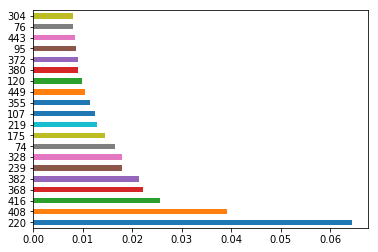

In [17]:
# Top 20 features
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [67]:
len(feat_importances)

1000

In [ ]:
feat_importances[304]

Confusion matrix, without normalization
[[233  51]
 [101 174]]


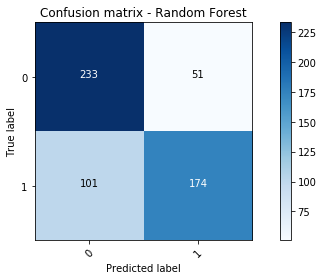

In [18]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Random Forest')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


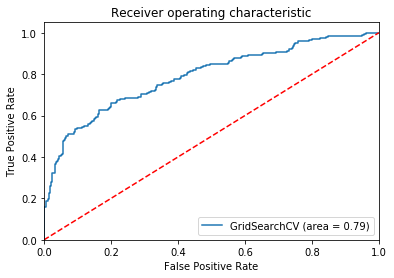

In [19]:
# Plotting ROC curve
from sklearn import metrics
probs = grid_rfc_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [20]:
#gbm using grid search
from sklearn.model_selection import GridSearchCV
gbm = GradientBoostingClassifier()
grid_values = {'n_estimators' : [150, 200, 500], 'max_depth' : [7, 11, 15]}
grid_gbm_acc = GridSearchCV(gbm, param_grid = grid_values)
grid_gbm_acc.fit(X_train_vect, y_train)



/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [150, 200, 500], 'max_depth': [7, 11, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
grid_gbm_acc.best_params_

{'max_depth': 7, 'n_estimators': 500}

In [22]:
gb = GradientBoostingClassifier(n_estimators=500, max_depth=7)
start = time.time()
gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.6762075134168157
Precision : 0.6910569105691057
Recall : 0.6181818181818182
F1 Score : 0.6525911708253359
Fit time : 0.009216070175170898
Predict time : 0.2102830410003662
Confusion Matrix : 
[[208  76]
 [105 170]]


In [24]:
feat_importances = pd.Series(gb.feature_importances_, index=X_train_vect.columns.tolist())

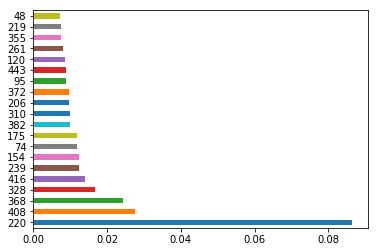

In [25]:
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Confusion matrix, without normalization
[[208  76]
 [105 170]]


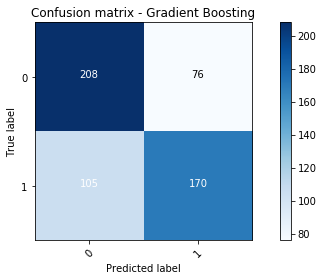

In [26]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Gradient Boosting')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


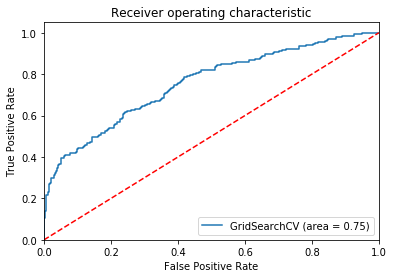

In [27]:
#plotting ROC curve
from sklearn import metrics
probs = grid_gbm_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [28]:
#xgbm using grid search
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgbm = XGBClassifier()
grid_values = {'n_estimators' : [150, 200, 500], 'max_depth' : [5, 7, 10]}
grid_xgbm_acc = GridSearchCV(xgbm, param_grid = grid_values)
grid_xgbm_acc.fit(X_train_vect, y_train)



/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [150, 200, 500], 'max_depth': [5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
grid_xgbm_acc.best_params_

{'max_depth': 5, 'n_estimators': 150}

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=150, max_depth=5)
start = time.time()
xgb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = xgb.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.7101967799642218
Precision : 0.7579908675799086
Recall : 0.6036363636363636
F1 Score : 0.6720647773279351
Fit time : 0.02222895622253418
Predict time : 0.2102830410003662
Confusion Matrix : 
[[231  53]
 [109 166]]


In [31]:
feat_importances = pd.Series(xgb.feature_importances_, index=X_train_vect.columns.tolist())

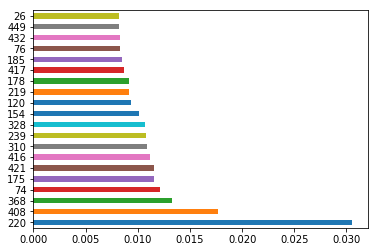

In [32]:
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Confusion matrix, without normalization
[[231  53]
 [109 166]]


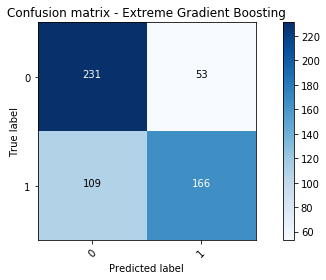

In [33]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Extreme Gradient Boosting')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


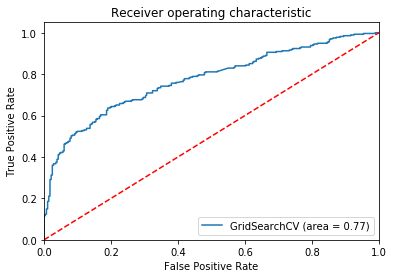

In [34]:
#plotting ROC curve
from sklearn import metrics
probs = grid_xgbm_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [77]:
#logistic regression grid search
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
from sklearn.model_selection import GridSearchCV
clf = lm.LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train_vect, y_train)



/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
grid_clf_acc.best_params_

{'C': 1, 'penalty': 'l2'}

In [90]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm

log = lm.LogisticRegression(C = 1, penalty = 'l2')
start = time.time()
log.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = log.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.7209302325581395
Precision : 0.7535545023696683
Recall : 0.6045627376425855
F1 Score : 0.6708860759493671
Fit time : 0.004809856414794922
Predict time : 0.2102830410003662
Confusion Matrix : 
[[244  52]
 [104 159]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [96]:
import numpy as np
logmodel = log.fit(X_train_vect, y_train)
coefs=logmodel.coef_[0]
top_three = np.argpartition(coefs, -20)[-20:]
top_three

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([335,   7, 368, 327, 453, 221,  25, 357, 234, 419, 380, 237, 346,
       383,  75, 411,  64, 104,  77, 220])

Confusion matrix, without normalization
[[229  55]
 [ 96 179]]


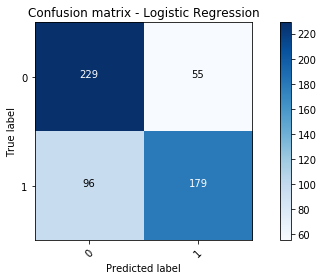

In [43]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Logistic Regression')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

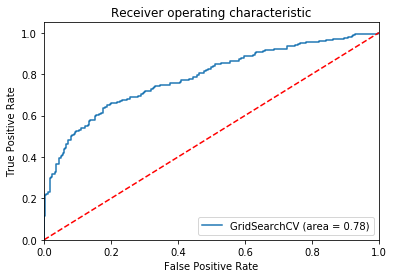

In [44]:
#plotting ROC curve
from sklearn import metrics
probs = grid_clf_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [132]:
#Using Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

nb = GaussianNB()
start = time.time()
nb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = nb.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.7334525939177102
Precision : 0.7456896551724138
Recall : 0.6577946768060836
F1 Score : 0.698989898989899
Fit time : 0.014764070510864258
Predict time : 0.2102830410003662
Confusion Matrix : 
[[237  59]
 [ 90 173]]


In [136]:

pos_class_prob_sorted = nb.feature_log_prob_[1, :].argsort()

print(np.take(tfidf_vect.get_feature_names(), pos_class_prob_sorted[-20:]))


['servic' 'develop' 'result' 'posit' 'million' 'custom' 'continu' 'strong'
 'execut' 'increas' 'expect' 'oper' 'busi' 'sale' 'quarter' 'revenu'
 'product' 'market' 'compani' 'growth']


Confusion matrix, without normalization
[[203  81]
 [ 93 182]]


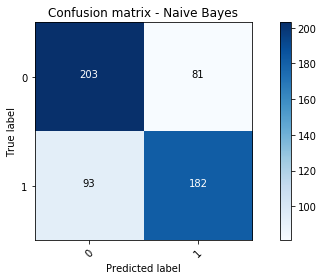

In [48]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Naive Bayes')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

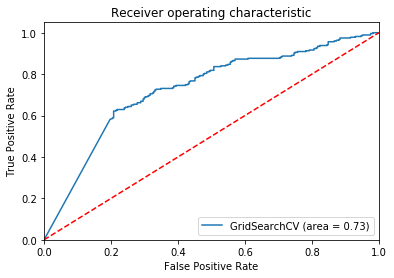

In [49]:
#plotting ROC curve
from sklearn import metrics
probs = nb.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [50]:
#KNN using grid search
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10)

grid.fit(X_train_vect, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
grid.best_params_

{'n_neighbors': 29}

In [55]:
#Using K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 29)
start = time.time()
knn.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = knn.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.6905187835420393
Precision : 0.8227848101265823
Recall : 0.4727272727272727
F1 Score : 0.6004618937644342
Fit time : 0.809783935546875
Predict time : 0.2102830410003662
Confusion Matrix : 
[[256  28]
 [145 130]]


Confusion matrix, without normalization
[[256  28]
 [145 130]]


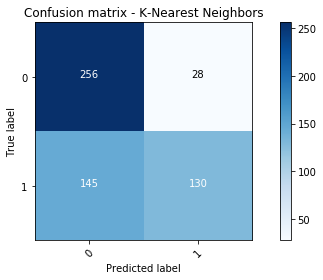

In [58]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - K-Nearest Neighbors')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

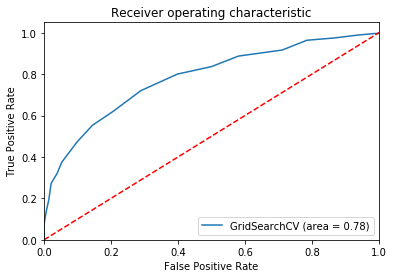

In [59]:
#plotting ROC curve
from sklearn import metrics
probs = grid.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()